In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.model_selection import KFold
import math
from sklearn import metrics

In [323]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
f_names = iris.feature_names

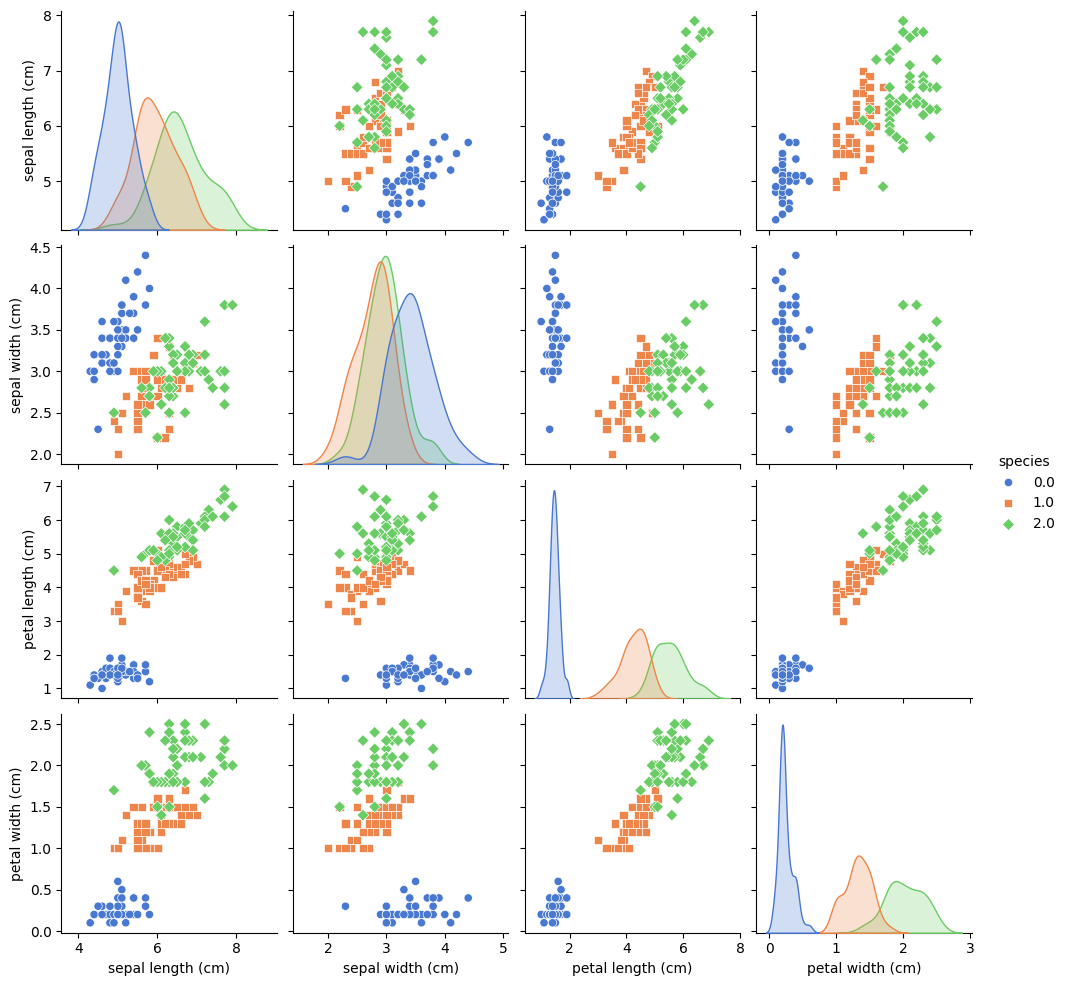

In [324]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])
g = sns.pairplot(iris_df, hue='species', palette='muted', markers=["o", "s", "D"])
# print(iris['target'])

In [325]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# for c in (0,1,2,3): 
#     print(X_train)
#     print(X_train[:,c])
#     break
# print(X_train.shape[0])

In [326]:
def epanechnikov(dist):
    return np.where(np.abs(dist) <= 1.0, 3.0 / 4 * (1 - dist ** 2), 0.0)


def quadratic(dist):
    return np.where(np.abs(dist) <= 1.0, 15.0 / 16 * (1 - dist ** 2), 0.0)


def triangular(dist):
    return np.where(np.abs(dist) <= 1.0, 1 - abs(dist), 0.0)


def gauss(dist):
    return math.pow(2 * np.pi, -1.0 / 2) * np.exp(-1 / 2 * (dist ** 2))


def rectangular(dist):
    return np.where(np.abs(dist) <= 1.0, 1 / 2, 0.0)

In [327]:
class PotentialFunctionMethod:
    kernels = {
        "triangular": triangular,
        "epanechnikov": epanechnikov,
        "quadratic": quadratic,
        "gauss": gauss,
        "rectangular": rectangular}
    
    
    def __init__(self,H = 5,kernel = "gauss", p = 2):
        self.H = H
        self.kernel = self.kernels[kernel]
        self.p = 2
                                
    def predict(self, X: np.array):
        test_X = np.copy(X)
        
        if len(test_X.shape) < 2:
            test_X = test_X[np.newaxis, :]
        
        diff = test_X[:, np.newaxis, :] - self.train_X[np.newaxis, :, :]
        distances = np.power(np.sum((diff ** self.p), -1), 1/self.p)
        weights = self.potentials * self.kernel(distances / self.H)
        
        classes = np.unique(self.train_y)
        table = np.zeros((test_X.shape[0], len(classes)))
#         print(len(classes), table.shape, classes)
        for c in range(len(classes)):
            table[:, c] = np.sum(weights[:, self.train_y == c], axis=1)
        
        return np.argmax(table, axis=1)
    
    def predict_for_create(self, X: np.array, diff: np.array):
        test_X = np.copy(X)
        
        if len(test_X.shape) < 2:
            test_X = test_X[np.newaxis, :]
        
        distances = np.power(np.sum((diff[np.newaxis, :, :] ** self.p), -1), 1/self.p)
        weights = self.potentials * self.kernel(distances / self.H)        
        classes = np.unique(self.train_y)
        table = np.zeros((test_X.shape[0], len(classes)))
        
        for c in range(len(classes)):
            table[:, c] = np.sum(weights[:, self.train_y == c], axis=1)
        
        return np.argmax(table, axis=1)
    
    def create(self, X: np.array, y: np.array, epochs = 1):
        assert X.shape[0] == y.shape[0]
        self.train_X = np.copy(X)
        self.train_y = np.copy(y)
        self.potentials = np.zeros_like(y, dtype=int)
    
        diff = X[:, np.newaxis, :] - self.train_X[np.newaxis, :, :]
        
        for _ in range(epochs):
            for i in range(self.train_X.shape[0]):
                if self.predict_for_create(X[i], diff[i]) != y[i]:
#                 if self.predict(X[i]) != y[i]:
                    self.potentials[i] += 1
#         print(self.potentials)
        
        self.nonzero_indexes0 = np.argwhere(self.potentials != 0)
        self.zero_indexes = np.where(self.potentials == 0)#[0] #first occurrence
        self.nonzero_indexes = np.nonzero(self.potentials != 0)
        self.train_X = self.train_X[self.nonzero_indexes]
        self.train_y = self.train_y[self.nonzero_indexes]
        self.potentials = self.potentials[self.nonzero_indexes]

In [328]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
# H = [3.0, 5.0, 7.0, 10.0, 12.0]
# P = [2, 1, 3, 4, 5]
# K = ["epanechnikov", "quadratic", "triangular", "gauss", "rectangular"]
H = [3.0, 5.0, 7.0, 10.0]
Pow = [2, 1, 3, 4]
Kernel = ["gauss", "triangular", "epanechnikov", "quadratic"]

param = product(*(Kernel, Pow, H))
# list(HP)

In [329]:
# a = np.arange(1, 10)
# # print(a, np.sum(a, -1))
# b1 = a[np.newaxis, :] # добавление оси axis0
# # print(b1.shape, b1)
# b2 = a[:, np.newaxis]
# # print(b2.shape, b2)
# # print(b2-b1)
# # print((b2-b1).shape)
# b3 = b2[:,:,np.newaxis]
# print(b3, np.sum(b3, 0))
# # print(b3.shape, b3, b3[:,0])

In [330]:
kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(X_train):
#         print(X_train[train_index].shape[0])
#         print(X_train[:, np.newaxis, :])
#         print(X_train[:, np.newaxis, :] - X_train[np.newaxis, :, :])

# score = 0
# best_model = None
# for (k, p, h) in param:
#     mpf = PotentialFunctionMethod(kernel=k, p=p, H=h)
#     for train_index, test_index in kf.split(X_train):
#         mpf.create(X_train[train_index], y_train[train_index])
#         predicted = mpf.predict(X_train[test_index])
#         new_score = metrics.accuracy_score(predicted, y_train[test_index])
#         if abs(new_score - score) > 1e-8:
#             score = new_score
#             best_model = mpf

In [331]:
arr = np.array(range(10))
print(arr)
arr2 = arr[:, np.newaxis]
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [332]:
print(best_model.kernel)
print(best_model.p)
print(best_model.H)

<function quadratic at 0x0000017F1609F310>
2
10.0


[  0 100   0 100 100   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2]


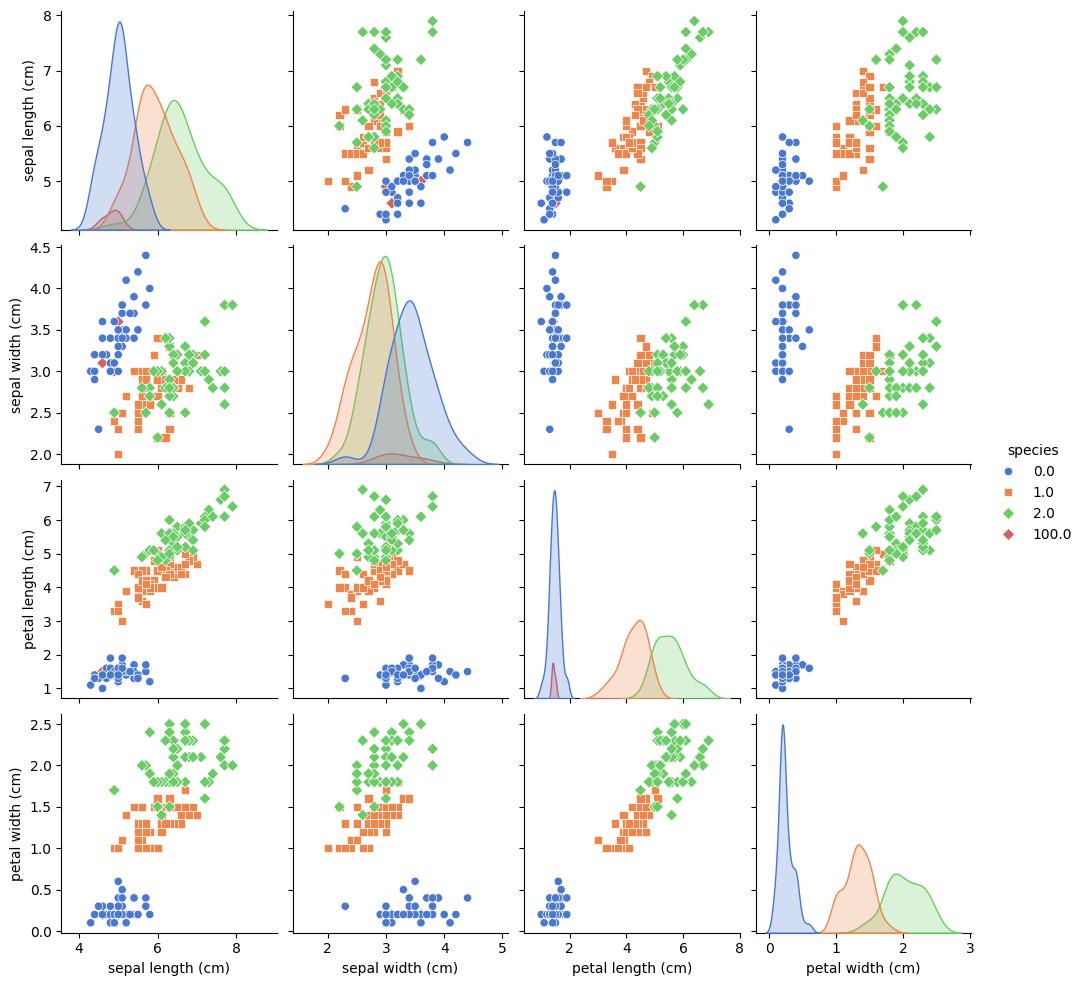

In [333]:
mpf = PotentialFunctionMethod(kernel="gauss", p=2, H=1)
mpf.create(X_train, y_train)

# nonzero = mpf.nonzero_indexes
# iris['target'][nonzero] = 100

nonzero = mpf.nonzero_indexes0
for i in (nonzero):
    if (iris['target'][i[0]] == 0):
        iris['target'][i[0]] = 100
print(iris['target'])

    
iris_cor = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])
g = sns.pairplot(iris_cor, hue='species', palette='muted', markers=["o", "s", "D", "D"])